# Distribuições de probabilidade


In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, pareto, norm, expon

In [23]:
np.random.seed(48)

## Exercício 1

Distribuição de probabilidade X ~ Bin(20, 0.15)

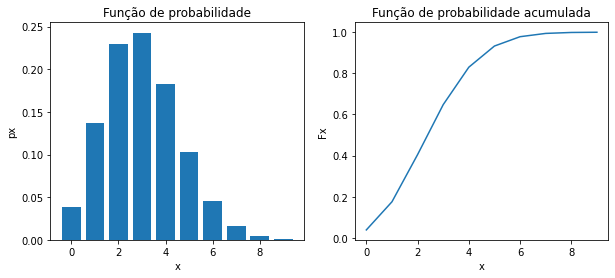

In [2]:
x = np.arange(0,10)
px = binom.pmf(k=x, n=20, p=0.15)
Fx = binom.cdf(x, n=20, p=0.15)

plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
plt.title('Função de probabilidade')
plt.xlabel('x')
plt.ylabel('px')
plt.bar(x, px)

plt.subplot(1,2,2)
plt.title('Função de probabilidade acumulada')
plt.xlabel('x')
plt.ylabel('Fx')
plt.plot(x, Fx)

#### 1.1 Qual o valor k em que P(X = k) é máxima? Quanto é esta probabilidade máxima?

In [3]:
kmax = np.argmax(px)
pmax = px[kmax]

print('k = {} e P(k) = {}'.format(kmax, pmax))

k = 3 e P(k) = 0.24282889614926753


#### 1.2  VISUALMENTE, obtenha uma faixa de valores (a, b) na qual a probabilidade de X ∈ (a, b)seja próxima de 1. Procure grosseiramente obter a faixa mais estreita possível.


(a,b) = (1,5)


#### 1.3  O valor (téorico) de E(X) no caso de uma binomial é nθ. Como é o comportamento da função P(X = k) no entorno deste valor E(X)? Ela tem valores P(X = k) relativamente altos?

O valor esperado é 20 x 0.15 = 3. A probabilidade no entorno desse valor é relativamente alta, próxima de P(x=3) = 0.25

####  1.4 Confirme esta impressão calculando P(a ≤ X ≤ b) usando a função dnorm ou pnorm do R. Por exemplo, se eu quiser P(5 ≤ X ≤ 8), uso sum(dnorm(5:8, 20, 0.15) ou então pbinom(8, 20, 0.15) - pbinom(5-0.01, 20, 0.15). Porque eu subtraio 0.01 de 5 na chamada da segunda função?

In [4]:
prob = binom.cdf(8, n=20, p=0.15) - binom.cdf(5-0.01, n=20, p=0.15)
print('Probabilidade = {}. Subtrai-se 0.01 de 5, porque o valor de P(x=5) é alto'.format(prob))

Probabilidade = 0.16882424534654916. Subtrai-se 0.01 de 5, porque o valor de P(x=5) é alto


#### 1.5  Use qbinom para obter o inteiro k tal que F(k) = P(X ≤ k) ≈ 0.95.

In [5]:
k = binom.ppf(0.95, n=20, p=0.15)
k

6.0

#### 1.6 Verifique o valor da probabilidade acumulada exata F(k) obtida com o inteiro acima usando pbinom.

In [6]:
prob = binom.cdf(6, n=20, p=0.15)
prob

0.9780648991431549

#### 1.7  Gere 1000 valores aleatórios independentes de X ∼ Bin(n = 20, θ = 0.15). Estes valores cairam, em sua maioria, na faixa que você escolheu mais acima? Qual a porcentagem de valores que caiu na faixa que você escolheu?

In [7]:
values = np.random.binomial(20, 0.15, 1000)
count = ((values >= 1) & (values <= 5)).sum()
print('{} valores cairam na faixa escolhida, correspondendo a {}%'.format(count, count/10))

880 valores cairam na faixa escolhida, correspondendo a 88.0%


#### 1.8  Compare os valores das probabilidades P(X = k) para k = 0, . . . 6 e as frequências relativas destes inteiros nos 100 valores simulados.São parecidos?

In [8]:
for k in range (0, 7):
    prob = binom.pmf(k, n=20, p=0.15)
    frequency = (values == k).sum()
    print('Probabilidade: P(k={})={}. Frequência: {}\n'.format(k, prob, frequency/1000))

Probabilidade: P(k=0)=0.03875953108451433. Frequência: 0.053

Probabilidade: P(k=1)=0.13679834500416826. Frequência: 0.137

Probabilidade: P(k=2)=0.2293384019187529. Frequência: 0.228

Probabilidade: P(k=3)=0.24282889614926753. Frequência: 0.229

Probabilidade: P(k=4)=0.18212167211195066. Frequência: 0.197

Probabilidade: P(k=5)=0.10284517954557217. Frequência: 0.089

Probabilidade: P(k=6)=0.045372873328928906. Frequência: 0.046



É possível perceber que são realmente valores muito semelhantes com o que foi gerado

## Exercício 2

#### 2.1 Obtenha o gráfico das probabilidades P(X = k) e da função de probabilidade acumulada F(x) para uma v.a. X ∼ Poisson(λ) usando dois valores: λ = 0.73 e λ = 10.

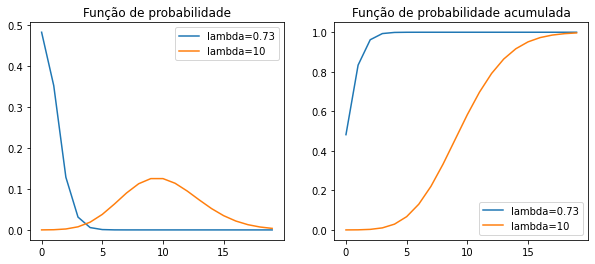

In [9]:
x = np.arange(0,20)

plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
plt.title('Função de probabilidade')
plt.plot(x, poisson.pmf(x, 0.73), ms=8, label='lambda=0.73')
plt.plot(x, poisson.pmf(x, 10), ms=8, label='lambda=10')
plt.legend()

plt.subplot(1,2,2)
plt.title('Função de probabilidade acumulada')
plt.plot(x, poisson.cdf(x, 0.73), ms=8, label='lambda=0.73')
plt.plot(x, poisson.cdf(x, 10), ms=8, label='lambda=10')
plt.legend()

#### 2.2  O valor k em que P(X = k) é máximo é próximo de E(X) = λ?

Sim. É possível visualizar através dos gráficos.

#### 2.3  Obtenha um intervalo de valores (a, b), o mais curto possível gosseiramente, para o qual P(X ∈ (a, b)) ≈ 1.

Para λ = 0.73, (a,b) = (0,3). Para λ = 10, (a,b) = (5,15)

#### 2.4  Usando ppois do R, calcule P(a ≤ X ≤ b).

In [10]:
p1 = poisson.cdf(3, 0.73)
p2 = poisson.cdf(15, 10) - poisson.cdf(5-0.01, 10)

print('Para lambda = 0.73, probabilidade = {}'.format(p1))
print('Para lambda = 10, probabilidade = {}'.format(p2))

Para lambda = 0.73, probabilidade = 0.993352334865238
Para lambda = 10, probabilidade = 0.9220069086190602


#### 2.5 Gere 200 valores aleatórios independentes de X ∼ Poisson(λ) com os dois valores acima para λ.

In [11]:
values1 = np.random.poisson(0.73, 200)
values2 = np.random.poisson(10, 200)

#### 2.6  Compare os valores das probabilidades P(X = k) para k = 0, . . . 6 e as frequências relativas destes inteiros nos 100 valores simulados.S˜ao parecidos?

In [12]:
print('LAMBDA = 0.73')
for k in range (0, 7):
    prob = poisson.pmf(k, 0.73)
    frequency = (values1 == k).sum()
    print('Probabilidade: P(k={})={}. Frequência: {}'.format(k, prob, frequency/200))
    
print('\n')
print('LAMBDA = 10')
for k in range (0, 7):
    prob = poisson.pmf(k, 10)
    frequency = (values2 == k).sum()
    print('Probabilidade: P(k={})={}. Frequência: {}'.format(k, prob, frequency/200))

LAMBDA = 0.73
Probabilidade: P(k=0)=0.48190899009020244. Frequência: 0.445
Probabilidade: P(k=1)=0.3517935627658478. Frequência: 0.41
Probabilidade: P(k=2)=0.12840465040953444. Frequência: 0.115
Probabilidade: P(k=3)=0.031245131599653378. Frequência: 0.02
Probabilidade: P(k=4)=0.005702236516936738. Frequência: 0.005
Probabilidade: P(k=5)=0.0008325265314727638. Frequência: 0.005
Probabilidade: P(k=6)=0.00010129072799585292. Frequência: 0.0


LAMBDA = 10
Probabilidade: P(k=0)=4.5399929762484854e-05. Frequência: 0.0
Probabilidade: P(k=1)=0.0004539992976248486. Frequência: 0.0
Probabilidade: P(k=2)=0.0022699964881242435. Frequência: 0.0
Probabilidade: P(k=3)=0.007566654960414144. Frequência: 0.005
Probabilidade: P(k=4)=0.01891663740103538. Frequência: 0.005
Probabilidade: P(k=5)=0.03783327480207079. Frequência: 0.03
Probabilidade: P(k=6)=0.06305545800345125. Frequência: 0.06


## Exercício 3

Distribuição Pareto

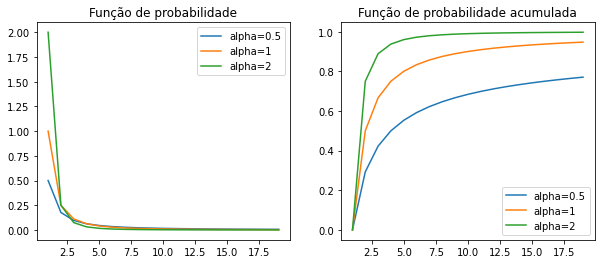

In [13]:
x = np.arange(1,20)

plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
plt.title('Função de probabilidade')
plt.plot(x, pareto.pdf(x, 0.5), ms=8, label='alpha=0.5')
plt.plot(x, pareto.pdf(x, 1), ms=8, label='alpha=1')
plt.plot(x, pareto.pdf(x, 2), ms=8, label='alpha=2')
plt.legend()

plt.subplot(1,2,2)
plt.title('Função de probabilidade acumulada')
plt.plot(x, pareto.cdf(x, 0.5), ms=8, label='alpha=0.5')
plt.plot(x, pareto.cdf(x, 1), ms=8, label='alpha=1')
plt.plot(x, pareto.cdf(x, 2), ms=8, label='alpha=2')
plt.legend()

In [14]:
print('Para alpha = 0.5')
for k in range(1, 20):
    probk = pareto.pdf(k, 0.5)
    probk1 = pareto.pdf(k+1, 0.5)
    result = (k/(k+1))**1.5
    print('k={} P(X=k+1)/P(X=k): {}. (k/k+1)^1+alpha: {}'.format(k, probk1/probk, result))

Para alpha = 0.5
k=1 P(X=k+1)/P(X=k): 0.3535533905932738. (k/k+1)^1+alpha: 0.3535533905932738
k=2 P(X=k+1)/P(X=k): 0.5443310539518174. (k/k+1)^1+alpha: 0.5443310539518174
k=3 P(X=k+1)/P(X=k): 0.649519052838329. (k/k+1)^1+alpha: 0.649519052838329
k=4 P(X=k+1)/P(X=k): 0.7155417527999327. (k/k+1)^1+alpha: 0.7155417527999328
k=5 P(X=k+1)/P(X=k): 0.7607257743127307. (k/k+1)^1+alpha: 0.7607257743127308
k=6 P(X=k+1)/P(X=k): 0.7935600855193298. (k/k+1)^1+alpha: 0.7935600855193298
k=7 P(X=k+1)/P(X=k): 0.8184875533567998. (k/k+1)^1+alpha: 0.8184875533567997
k=8 P(X=k+1)/P(X=k): 0.8380524814062784. (k/k+1)^1+alpha: 0.8380524814062785
k=9 P(X=k+1)/P(X=k): 0.8538149682454624. (k/k+1)^1+alpha: 0.8538149682454624
k=10 P(X=k+1)/P(X=k): 0.8667841720414476. (k/k+1)^1+alpha: 0.8667841720414475
k=11 P(X=k+1)/P(X=k): 0.8776415154433099. (k/k+1)^1+alpha: 0.8776415154433099
k=12 P(X=k+1)/P(X=k): 0.8868636210743287. (k/k+1)^1+alpha: 0.8868636210743288
k=13 P(X=k+1)/P(X=k): 0.8947938179694721. (k/k+1)^1+alpha:

Quanto maior o alpha, mais rapido a probabilidade decai conforme k aumenta

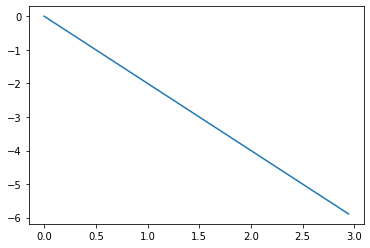

In [16]:
plt.plot(np.log(x), pareto.logpdf(x, 1))

Axes(0.125,0.125;0.775x0.755)
(-0.14722194895832202, 3.0916609281247625)


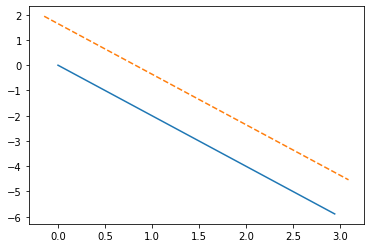

In [18]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

plt.plot(np.log(x), pareto.logpdf(x, 1))
abline(-2, 1.645)

In [32]:
def rzipf(nsim, alpha=1, Cte=1/1.645):
    res = np.zeros(nsim)
    for i in range(1, nsim):
        x = -1
        k = 1
        F = Cte
        p = Cte
        U = np.random.uniform()
        while x == -1:
            if U < F:
                x = k
            else:
                p = p * (k / (k+1))**(1+alpha)
                F = F + p
                k = k + 1
        res[i] = x
    return res

In [38]:
rzipf1 = rzipf(400)
rzipf1

array([  0.,   1.,   1.,   2.,   1.,   2.,  18.,   1.,   2.,   3.,   1.,
         2.,  15.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   4.,   1.,
         1.,   2.,   1.,   2.,   1.,   1.,   1.,   3.,   1.,   6.,   3.,
         1.,   1.,   1.,   1.,   1.,   1.,  13.,   1.,   1.,   4.,   1.,
         1.,   3.,   1.,   4.,   1.,   1.,   1.,   2.,  15.,  21.,   1.,
         7.,   5.,   1.,   3.,   1.,   2.,   1.,   5.,   1.,   1.,   1.,
         1.,   1.,  17.,   1.,   1.,   2.,   1.,   9.,   1.,   1.,   1.,
         4.,  29.,   1.,   2.,   1.,   4.,   1.,   1.,   1.,   1.,   2.,
         3.,   4.,   1.,   4.,   3.,   1.,   5.,   5.,   5.,   1.,   7.,
         1.,   1.,   1.,  10.,   1.,   2.,   1.,   2.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   2.,   1.,   2.,   2.,   1.,   2.,
         4.,   3.,   1.,   1.,   1.,   2.,   1.,   4.,   3.,   1.,   9.,
         1.,   2.,  13.,   1.,   1.,   4.,   2.,   3.,   4.,   3.,   1.,
        10.,  13.,   1.,   2.,   1.,   1.,   1.,   

## Exercício 4


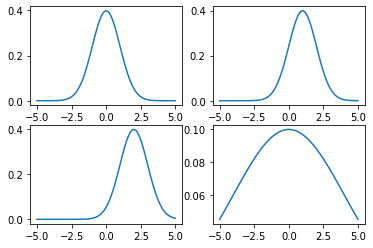

In [63]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x = np.linspace(-5, 5, 100)
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(x, norm.pdf(x, 0, 1))
ax2.plot(x, norm.pdf(x, 1, 1))
ax3.plot(x, norm.pdf(x, 2, 1))
ax4.plot(x, norm.pdf(x, 0, 4))

plt.show()

Visualmente, percebe-se que o ponto onde f(x) não varia com σ, enquanto a altura varia (um σ maior, gera uma altura menor), como é possível perceber no quarto plot, que vai até 0.10, enquanto o primeiro vai até 0.4

In [76]:
a = 10 - (2 * np.sqrt(5))
b = 10 + (2 * np.sqrt(5))

area = norm.cdf(b, 10, 5) - norm.cdf(a, 10, 5)
area

0.6289066304773026

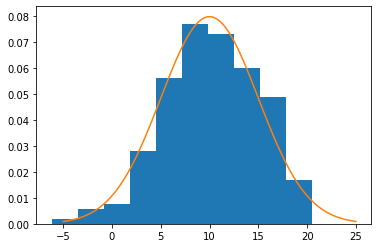

In [86]:
values = np.random.normal(10, 5, 200)
x = np.linspace(-5, 25, 100)

plt.hist(values, density=True)
plt.plot(x, norm.pdf(x, 10, 5))
plt.show()

É possível perceber que a distribuição N(10,5) se ajusta bem ao histograma.

## Exercício 7

**Seja X ∼ exp(1/3). Isto é, X ∼ exp(λ) com λ = 1/3. Calcule E(X), F(x) e P(X > 3).**

In [88]:
px = expon.cdf(3, scale=3)
px

0.6321205588285577

E(X) = 1 / (1/3) = 3

P(X>3) = 1 - 0.63 = 0.37
